In [41]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [42]:
data = pd.read_csv(r"C:\Users\Vedha\Downloads\abalone.csv")

In [47]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [48]:
#3.Uni Variant Analysis

C:\Users\Vedha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rings', ylabel='Density'>

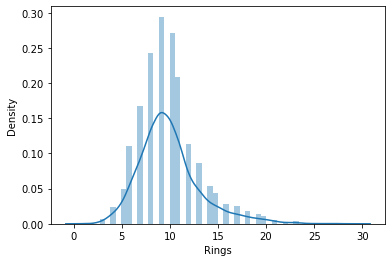

In [52]:
sns.distplot(data['Rings'])

In [53]:
##3.Bi variant Analysis

C:\Users\Vedha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length', ylabel='Diameter'>

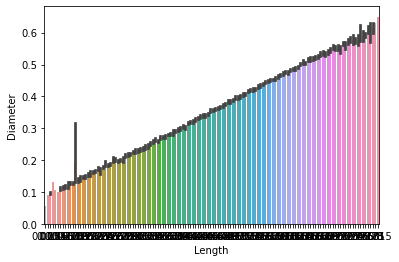

In [54]:
sns.barplot(data['Length'],data['Diameter'])

In [59]:
##3.Multi Variant Analysis

C:\Users\Vedha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length', ylabel='Diameter'>

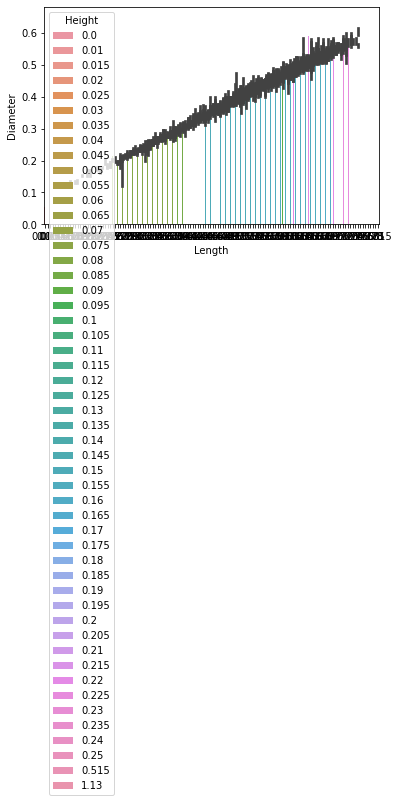

In [60]:
sns.barplot(data['Length'],data['Diameter'], hue = data['Height'])

In [61]:
##4. Descriptive Analysis

In [62]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

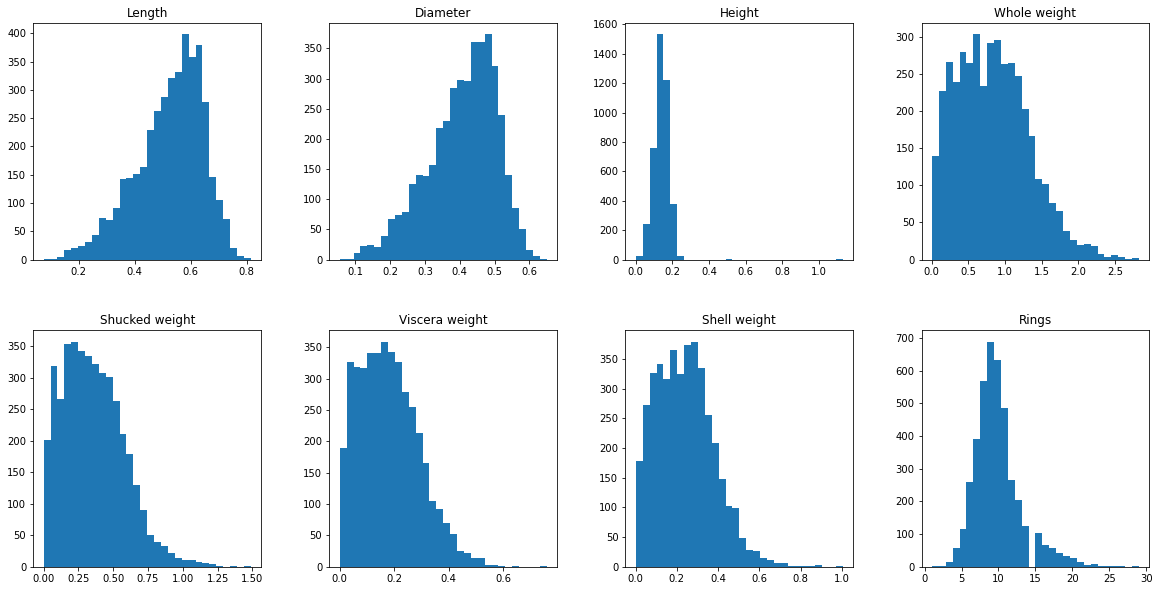

In [63]:
data.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

In [64]:
##5. Missing Values

In [65]:
missing_values = data.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(data))*100
pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])

,Missing values,% Missing
Sex,0,0.0
Length,0,0.0
Diameter,0,0.0
Height,0,0.0
Whole weight,0,0.0
Shucked weight,0,0.0
Viscera weight,0,0.0
Shell weight,0,0.0
Rings,0,0.0


In [66]:
## 7.Check for Categorical columns and perform encoding.

In [67]:
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
le = LabelEncoder()
oneh = OneHotEncoder()
data['Length'] = le.fit_transform(data['Length'])
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,66,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,45,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,81,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,63,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,41,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [68]:
## 8. Data sheet into dependent and independent variables

In [69]:
data.iloc[:, :-1].values

array([['M', 66, 0.365, ..., 0.2245, 0.101, 0.15],
       ['M', 45, 0.265, ..., 0.0995, 0.0485, 0.07],
       ['F', 81, 0.42, ..., 0.2565, 0.1415, 0.21],
       ...,
       ['M', 95, 0.475, ..., 0.5255, 0.2875, 0.308],
       ['F', 100, 0.485, ..., 0.531, 0.261, 0.296],
       ['M', 117, 0.555, ..., 0.9455, 0.3765, 0.495]], dtype=object)

In [70]:
data.iloc[:, -1].values

array([15,  7,  9, ...,  9, 10, 12], dtype=int64)

In [71]:
## 9. scaling independent values

In [72]:
from sklearn import preprocessing

 

X_data = data.Height

 

standard = preprocessing.scale(X_data)
print(standard)

[-1.06442415 -1.18397831 -0.10799087 ...  1.56576738  0.25067161
  1.32665906]


In [73]:
standard

array([-1.06442415, -1.18397831, -0.10799087, ...,  1.56576738,
        0.25067161,  1.32665906])

In [74]:
## 10. split data into Training and Testing

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1]
y = data.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.05, random_state=0)


In [76]:
X_train

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
678,F,65,0.380,0.165,0.8165,0.2500,0.1915,0.2650
3009,I,26,0.185,0.065,0.0740,0.0305,0.0165,0.0200
1906,I,90,0.450,0.135,0.8245,0.3375,0.2115,0.2390
768,F,85,0.430,0.155,0.7850,0.2890,0.2270,0.2330
2781,M,94,0.475,0.140,1.0305,0.4925,0.2170,0.2780
...,...,...,...,...,...,...,...,...
1033,M,105,0.525,0.185,1.6220,0.6645,0.3225,0.4770
3264,F,106,0.500,0.140,1.1705,0.5405,0.3175,0.2850
1653,M,94,0.450,0.145,0.9590,0.4630,0.2065,0.2535
2607,F,100,0.490,0.165,1.1270,0.4770,0.2365,0.3185


In [77]:
X_test

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
668,M,85,0.425,0.155,0.9175,0.2775,0.2430,0.3350
1580,I,75,0.400,0.120,0.6160,0.2610,0.1430,0.1935
3784,M,99,0.480,0.155,1.2555,0.5270,0.3740,0.3175
463,I,19,0.165,0.055,0.0545,0.0215,0.0120,0.0200
2615,M,104,0.500,0.175,1.5105,0.6735,0.3755,0.3775
...,...,...,...,...,...,...,...,...
1670,F,97,0.485,0.150,1.2405,0.6025,0.2915,0.3085
3055,F,97,0.495,0.160,1.0890,0.4690,0.1980,0.3840
3366,M,31,0.210,0.065,0.0905,0.0350,0.0200,0.0300
1410,F,108,0.530,0.180,1.4910,0.6345,0.3420,0.4350


In [78]:
##12.Train the modal

In [79]:
from random import randint
  
# the limit within which random numbers are generated
TRAIN_SET_LIMIT = 1000
  
# to create exactly 100 data items
TRAIN_SET_COUNT = 100
  
# list that contains input and corresponding output
TRAIN_INPUT = list()
TRAIN_OUTPUT = list()
  
# loop to create 100 data  items with three columns each
for i in range(TRAIN_SET_COUNT):
    a = randint(0, TRAIN_SET_LIMIT)
    b = randint(0, TRAIN_SET_LIMIT)
    c = randint(0, TRAIN_SET_LIMIT)
  
# creating the output for each data item
    op = a + (2 * b) + (3 * c)
    TRAIN_INPUT.append([a, b, c])
  
# adding each output to output list
    TRAIN_OUTPUT.append(op)

In [80]:
from sklearn.linear_model import LinearRegression
  
# Initialize the linear regression model
predictor = LinearRegression(n_jobs =-1)
  
# Fill the Model with the Data
predictor.fit(X = TRAIN_INPUT, y = TRAIN_OUTPUT)

LinearRegression(n_jobs=-1)

In [81]:
## 13. Test the modal

In [82]:
X_TEST = [[ 10, 20, 30 ]]
  
# Predict the result of X_TEST which holds testing data
outcome = predictor.predict(X = X_TEST)
  
# Predict the coefficients
coefficients = predictor.coef_
  
# Print the result obtained for the test data
print('Outcome : {}\nCoefficients : {}'.format(outcome, coefficients))

Outcome : [140.]
Coefficients : [1. 2. 3.]


In [83]:
## 6. Finding outliers and replace them

C:\Users\Vedha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rings'>

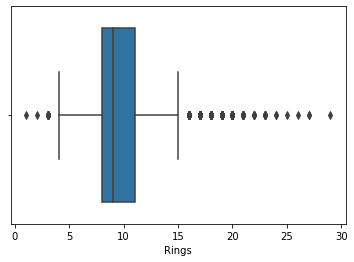

In [84]:
sns.boxplot(data['Rings'])

In [85]:
q = data.quantile([0.75,0.25])

In [86]:
q

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0.75,98.0,0.48,0.165,1.1530,0.502,0.2530,0.329,11.0
0.25,65.0,0.35,0.115,0.4415,0.186,0.0935,0.130,8.0


In [87]:
iqr = q.iloc[0] - q.iloc[1]

In [88]:
iqr

Length            33.0000
Diameter           0.1300
Height             0.0500
Whole weight       0.7115
Shucked weight     0.3160
Viscera weight     0.1595
Shell weight       0.1990
Rings              3.0000
dtype: float64

In [89]:
u = q.iloc[0] + (1.5*iqr)

In [90]:
u

Length            147.50000
Diameter            0.67500
Height              0.24000
Whole weight        2.22025
Shucked weight      0.97600
Viscera weight      0.49225
Shell weight        0.62750
Rings              15.50000
dtype: float64

In [91]:
l = q.iloc[1] - (1.5*iqr)

In [92]:
l

Length            15.50000
Diameter           0.15500
Height             0.04000
Whole weight      -0.62575
Shucked weight    -0.28800
Viscera weight    -0.14575
Shell weight      -0.16850
Rings              3.50000
dtype: float64

In [93]:
data['Rings'] = np.where(data['Rings']>14,9,data['Rings'])

C:\Users\Vedha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rings'>

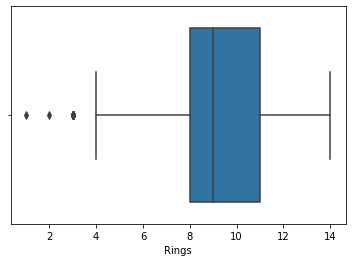

In [94]:
sns.boxplot(data['Rings'])

In [95]:
## 11. Modal building

In [96]:
data['Sex'] = LabelEncoder().fit_transform(data['Sex'].tolist())

In [97]:
transformed_sex_feature = OneHotEncoder().fit_transform(data['Sex'].values.reshape(-1,1)).toarray()
data_sex_encoded = pd.DataFrame(transformed_sex_feature, columns = ["Sex_"+str(int(i)) for i in range(transformed_sex_feature.shape[1])])
data = pd.concat([data, data_sex_encoded], axis=1)

In [98]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_0,Sex_1,Sex_2
0,2,66,0.365,0.095,0.5140,0.2245,0.1010,0.150,9,0.0,0.0,1.0
1,2,45,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0.0,0.0,1.0
2,0,81,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1.0,0.0,0.0
3,2,63,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0.0,0.0,1.0
4,1,41,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0.0,1.0,0.0


In [99]:
Xtrain = data.drop(['Rings','Height','Sex'], axis = 1)
Ytrain = data['Rings']

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
logreg = LogisticRegression()
'''Learning from Training Set'''
logreg.fit(X_train, Y_train)
'''Predicting for Training Set'''
Y_pred = logreg.predict(X_test)
'''Accuracy Score'''
result_acc = accuracy_score(Y_test,Y_pred)

C:\Users\Vedha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [102]:
result_acc

0.30384336475707036